# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

## 1 Support Vector Machines

### 1.1 Example Dataset 1

In [2]:
data = loadmat("ex6data1.mat")
X, y = data["X"], data["y"].ravel()
print(X.shape, y.shape)

(51, 2) (51,)


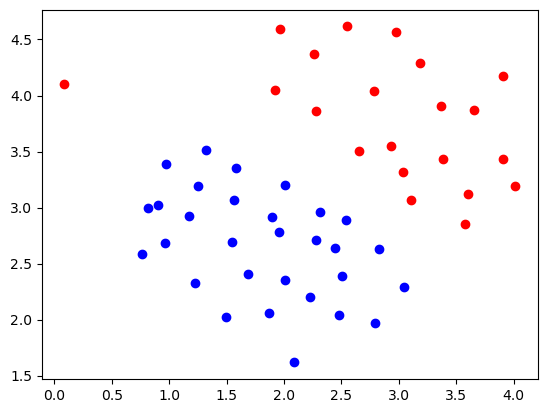

In [3]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
plt.show()

In [4]:
def plotDecisionBoundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = clf.decision_function(X_plot).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.show()

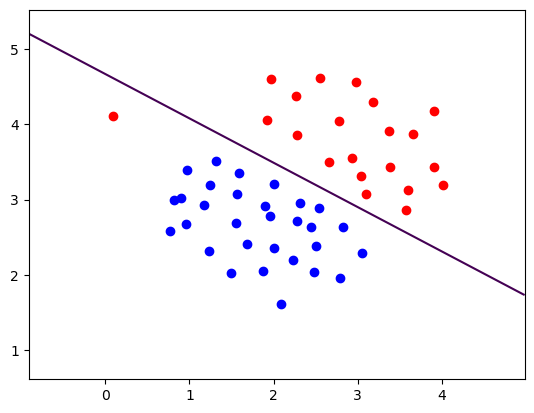

In [5]:
clf = LinearSVC(C=1)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

C:\Users\Lenova\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


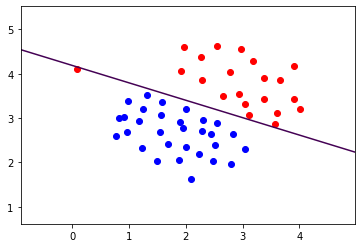

In [7]:
clf = LinearSVC(C=100)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

### 1.2 SVM with Gaussian Kernels

### 1.2.2 Example Dataset 2

In [6]:
data = loadmat("ex6data2.mat")
X, y = data["X"], data["y"].ravel()
print(X.shape, y.shape)

(863, 2) (863,)


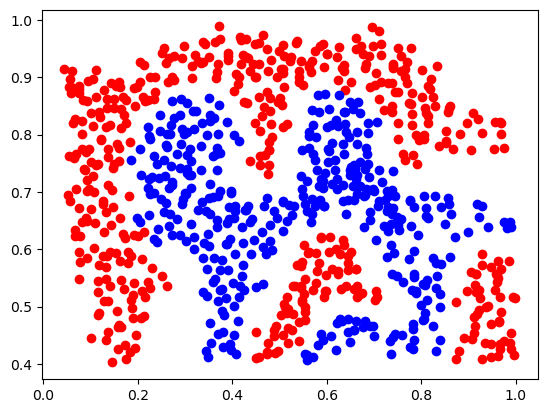

In [7]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
plt.show()

In [8]:
def plotDecisionBoundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = clf.decision_function(X_plot).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.show()

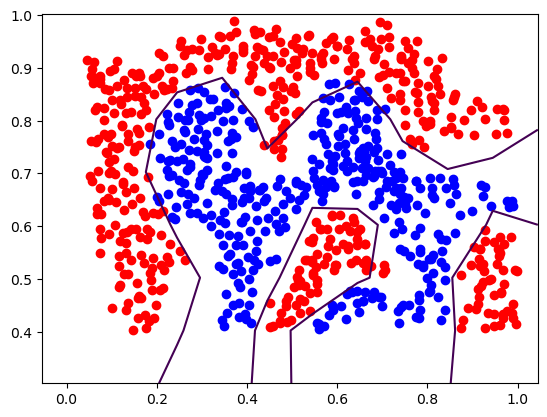

In [9]:
clf = SVC(C=30, gamma=30)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)

### 1.2.3 Example Dataset 3

In [10]:
data = loadmat("ex6data3.mat")
X, y = data["X"], data["y"].ravel()
Xval, yval = data["Xval"], data["yval"].ravel()
print(X.shape, y.shape)
print(Xval.shape, yval.shape)

(211, 2) (211,)
(200, 2) (200,)


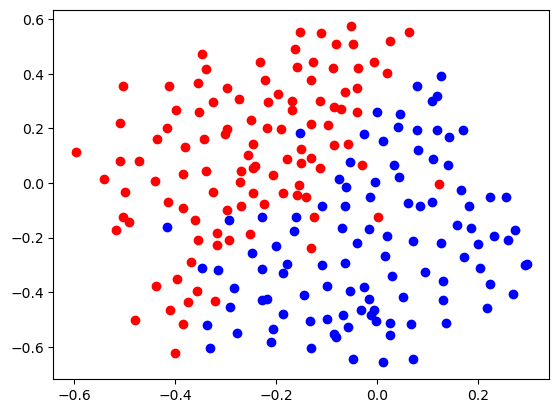

In [11]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
plt.show()

In [12]:
possible_C = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
possible_gamma = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
best_score = -np.inf
for C in possible_C:
    for gamma in possible_gamma:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        score = clf.score(Xval, yval)
        if score > best_score:
            best_C = C
            best_gamma = gamma
            best_score = score
print(best_C)
print(best_gamma)
print(best_score)

3.0
30.0
0.965


In [13]:
def plotDecisionBoundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    y_plot = clf.decision_function(X_plot).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.show()

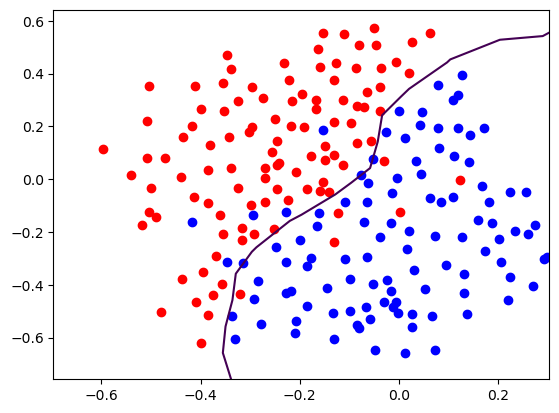

In [14]:
clf = SVC(C=3, gamma=30)
clf.fit(X, y)
plotDecisionBoundary(clf, X, y)